In [12]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
import numpy as np

In [7]:
source_path = '/content/FoodImage'

source_path_sayur = os.path.join(source_path, 'sayur')
source_path_tahu = os.path.join(source_path, 'tahu')
source_path_tempe = os.path.join(source_path, 'tempe')

print(f"There are {len(os.listdir(source_path_sayur))} images of sayur.")
print(f"There are {len(os.listdir(source_path_tahu))} images of tahu.")
print(f"There are {len(os.listdir(source_path_tempe))} images of tempe.")

There are 221 images of sayur.
There are 99 images of tahu.
There are 128 images of tempe.


In [8]:
# Define root directory
root_dir = '/content/FoodClass'

if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_test_dirs(root_path):
  os.makedirs(os.path.join(root_path, 'training'))
  os.makedirs(os.path.join(f'{root_path}/training', 'sayur'))
  os.makedirs(os.path.join(f'{root_path}/training', 'tahu'))
  os.makedirs(os.path.join(f'{root_path}/training', 'tempe'))
  os.makedirs(os.path.join(root_path, 'testing'))
  os.makedirs(os.path.join(f'{root_path}/testing', 'sayur'))
  os.makedirs(os.path.join(f'{root_path}/testing', 'tahu'))
  os.makedirs(os.path.join(f'{root_path}/testing', 'tempe'))


try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [9]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/content/FoodClass/testing
/content/FoodClass/training
/content/FoodClass/testing/sayur
/content/FoodClass/testing/tempe
/content/FoodClass/testing/tahu
/content/FoodClass/training/sayur
/content/FoodClass/training/tempe
/content/FoodClass/training/tahu


In [10]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

  shuffled_source = random.sample(os.listdir(SOURCE), len(os.listdir(SOURCE)))

  training_number = int(len(shuffled_source) * SPLIT_SIZE)

  i = 0
  target = TRAINING

  for item in shuffled_source:
    item_source = os.path.join(SOURCE, item)
    if os.path.getsize(item_source) == 0:
      print(f'{item} is zero length, so ignoring.')
    else:
      copyfile(item_source, os.path.join(target, item))
      i += 1

    if i == training_number:
      target = TESTING

In [11]:
# Test your split_data function

# Define paths
SAYUR_SOURCE_DIR = "/content/FoodImage/sayur/"
TAHU_SOURCE_DIR = "/content/FoodImage/tahu/"
TEMPE_SOURCE_DIR= "/content/FoodImage/tempe/"

TRAINING_DIR = "/content/FoodClass/training/"
TESTING_DIR = "/content/FoodClass/testing/"

TRAINING_SAYUR_DIR = os.path.join(TRAINING_DIR, "sayur/")
TESTING_SAYUR_DIR = os.path.join(TESTING_DIR, "sayur/")

TRAINING_TAHU_DIR = os.path.join(TRAINING_DIR, "tahu/")
TESTING_TAHU_DIR = os.path.join(TESTING_DIR, "tahu/")

TRAINING_TEMPE_DIR = os.path.join(TRAINING_DIR, "tempe/")
TESTING_TEMPE_DIR = os.path.join(TESTING_DIR, "tempe/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_SAYUR_DIR)) > 0:
  for file in os.scandir(TRAINING_SAYUR_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_SAYUR_DIR)) > 0:
  for file in os.scandir(TESTING_SAYUR_DIR):
    os.remove(file.path)

if len(os.listdir(TRAINING_TAHU_DIR)) > 0:
  for file in os.scandir(TRAINING_TAHU_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_TAHU_DIR)) > 0:
  for file in os.scandir(TESTING_TAHU_DIR):
    os.remove(file.path)

if len(os.listdir(TRAINING_TEMPE_DIR)) > 0:
  for file in os.scandir(TRAINING_TEMPE_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_TEMPE_DIR)) > 0:
  for file in os.scandir(TESTING_TEMPE_DIR):
    os.remove(file.path)


# Define proportion of images used for training
split_size = .9

# Run the function
split_data(SAYUR_SOURCE_DIR, TRAINING_SAYUR_DIR, TESTING_SAYUR_DIR, split_size)
split_data(TAHU_SOURCE_DIR, TRAINING_TAHU_DIR, TESTING_TAHU_DIR, split_size)
split_data(TEMPE_SOURCE_DIR, TRAINING_TEMPE_DIR, TESTING_TEMPE_DIR, split_size)

# Check that the number of images matches the expected output
print(f"\n\nThere are {len(os.listdir(TRAINING_SAYUR_DIR))} images of sayur for training")
print(f"There are {len(os.listdir(TRAINING_TAHU_DIR))} images of tahu for training")
print(f"There are {len(os.listdir(TRAINING_TAHU_DIR))} images of tempe for training")

print(f"\n\nThere are {len(os.listdir(TESTING_SAYUR_DIR))} images of sayur for testing")
print(f"There are {len(os.listdir(TESTING_TAHU_DIR))} images of tahu for testing")
print(f"There are {len(os.listdir(TESTING_TAHU_DIR))} images of tempe for testing")



There are 198 images of sayur for training
There are 89 images of tahu for training
There are 89 images of tempe for training


There are 23 images of sayur for testing
There are 10 images of tahu for testing
There are 10 images of tempe for testing


In [23]:
# # GRADED FUNCTION: train_val_generators
# def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
#   ### START CODE HERE

#   # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
#   train_datagen = ImageDataGenerator(rescale = 1./255.)

#   # Pass in the appropiate arguments to the flow_from_directory method
#   train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
#                                                       batch_size=45,
#                                                       class_mode='binary',
#                                                       target_size=(150, 150))

#   # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
#   validation_datagen = ImageDataGenerator(rescale = 1./255.)

#   # Pass in the appropiate arguments to the flow_from_directory method
#   validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
#                                                                 batch_size=5,
#                                                                 class_mode='binary',
#                                                                 target_size=(150, 150))
#   ### END CODE HERE
#   return train_generator, validation_generator

In [22]:
# # Test your generators
# train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

In [41]:
n_classes = 3
batch_size = 32
img_width, img_height = 299, 299

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='categorical')


val_datagen = ImageDataGenerator(rescale=1. / 255)

val_generator = val_datagen.flow_from_directory(
    TESTING_DIR,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='categorical')

Found 402 images belonging to 3 classes.
Found 46 images belonging to 3 classes.


In [42]:
class_map = train_generator.class_indices
class_map

{'sayur': 0, 'tahu': 1, 'tempe': 2}

In [45]:
def create_model():

  ### START CODE HERE

  # Define the model
  # Use no more than 2 Conv2D and 2 MaxPooling2D
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(299, 299, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    # 26 classes
    tf.keras.layers.Dense(3, activation='softmax')
  ])


  model.compile(optimizer = tf.optimizers.Adam(),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

  ### END CODE HERE

  return model

In [46]:
# Save your model
model = create_model()

# Train your model
history = model.fit(train_generator,
                    epochs=15,
                    validation_data=val_generator)

Epoch 1/15
13/13 [==============================] - 144s 11s/step - loss: 4.2018 - accuracy: 0.4080 - val_loss: 1.0187 - val_accuracy: 0.5000
Epoch 2/15
13/13 [==============================] - 139s 11s/step - loss: 0.9568 - accuracy: 0.4876 - val_loss: 1.0456 - val_accuracy: 0.4348
Epoch 3/15
13/13 [==============================] - 140s 11s/step - loss: 0.9412 - accuracy: 0.4851 - val_loss: 0.9853 - val_accuracy: 0.3913
Epoch 4/15
13/13 [==============================] - 140s 11s/step - loss: 0.9100 - accuracy: 0.5075 - val_loss: 0.9805 - val_accuracy: 0.4565
Epoch 5/15
13/13 [==============================] - 140s 11s/step - loss: 0.8824 - accuracy: 0.5124 - val_loss: 1.1425 - val_accuracy: 0.4348
Epoch 6/15
13/13 [==============================] - 141s 11s/step - loss: 0.8745 - accuracy: 0.5274 - val_loss: 1.1263 - val_accuracy: 0.4783
Epoch 7/15
13/13 [==============================] - 140s 11s/step - loss: 0.8509 - accuracy: 0.5572 - val_loss: 0.9547 - val_accuracy: 0.5000
Epoch 

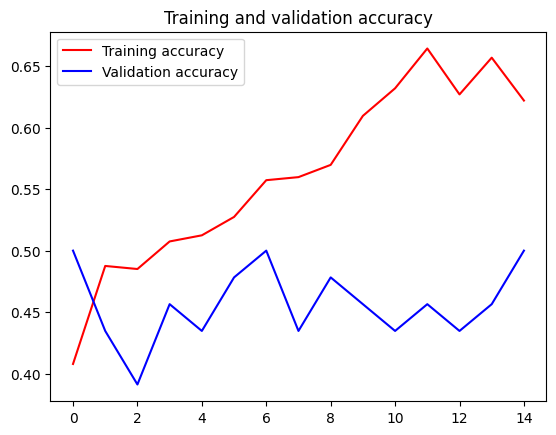

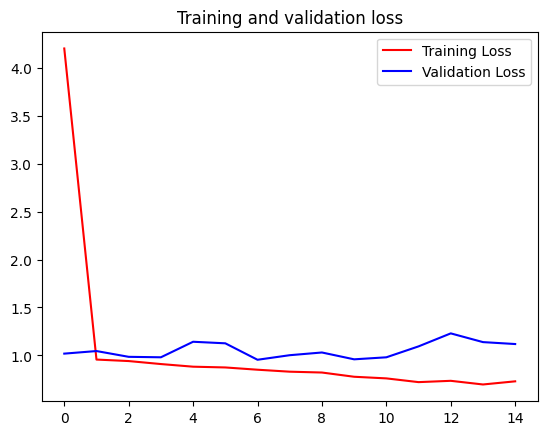

In [47]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()